In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import imghdr
from imutils import paths
from matplotlib import pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
#from tensorflow.keras.datasets import cifar10

2024-01-16 12:49:44.120112: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/wm/27t26d7s19x9dw6pqtmxtdch0000gn/T/ipykernel_55085/422864936.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Dela i subklassar efter den minsta klassen

In [46]:
data = pd.read_csv('fairface.csv')

main_directory = '/Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images'
structured_directory = '/Users/yari/2023/Applicerad_AI/fairfacedata/stractured_directory'

file_count_per_gender = data['race'].value_counts().min()

# Dictionary to track the number of files in each subfolder
file_counts = dict.fromkeys(data['race'].unique(), 0)

for index, row in data.iterrows():
    gender = row['race']
    # Only proceed if the limit for this subfolder has not been reached
    if file_counts[gender] < file_count_per_gender:
        source = os.path.join(main_directory, row['file'])
        gender_dir = os.path.join(structured_directory, gender)
        if not os.path.exists(gender_dir):
            os.makedirs(gender_dir)
        destination = os.path.join(gender_dir, row['file'])
        if os.path.exists(source):
            shutil.copy(source, destination)
            file_counts[gender] += 1
        else:
            print(f'File not found and skipped: {source}')

File not found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/28544.jpg
File not found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/3339.jpg


## dela bilderna i subklasser

In [177]:
import shutil

data = pd.read_csv('fairface.csv')

main_directory = '/Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images'
structured_directory = '/Users/yari/2023/Applicerad_AI/fairfacedata/gender_classes'

for index, row in data.iterrows():
    source = os.path.join(main_directory, row['file'])
    race_dir = os.path.join(structured_directory, row['gender'])
    if not os.path.exists(race_dir):
        os.makedirs(race_dir)
    destination = os.path.join(race_dir, row['file'])
    if os.path.exists(source):
        shutil.copy(source, destination)
    else:
        print(f'file could not be found and skipped: {source}')


file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/28544.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/31948.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/3339.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/34114.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/47808.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images/56453.jpg


## Split i train test och validation sets

In [625]:
base_dir = '/Users/yari/2023/Applicerad_AI/fairfacedata/race_classes'
# Directories for train test and split sets 
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val') 
test_dir = os.path.join(base_dir, 'test')

# Define the split sizes
train_split_size = 0.7
val_split_size = 0.15  
test_split_size = 0.15  
min_images_to_split = 2

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True) 
os.makedirs(test_dir, exist_ok=True)

for class_name in os.listdir(base_dir):
    if class_name.startswith('.'):
        continue

    class_dir = os.path.join(base_dir, class_name)
    if os.path.isdir(class_dir):
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True) 
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        
        files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        
        if len(files) >= min_images_to_split:
            # First split into training and temp (which will be further split into validation and test)
            train_files, temp_files = train_test_split(files, test_size=(val_split_size + test_split_size))
            
            # Now split the temp set into validation and test sets
            val_files, test_files = train_test_split(temp_files, test_size=test_split_size/(val_split_size + test_split_size))

            # Copy files into respective directories
            for f in train_files:
                shutil.copy(os.path.join(class_dir, f), os.path.join(train_dir, class_name))
            for f in val_files:
                shutil.copy(os.path.join(class_dir, f), os.path.join(val_dir, class_name))
            for f in test_files:
                shutil.copy(os.path.join(class_dir, f), os.path.join(test_dir, class_name))
        else:
            print(f"Class '{class_name}' has less than {min_images_to_split} images; skipping split.")

print("Dataset successfully split into training, validation, and testing sets.")



Class 'test' has less than 2 images; skipping split.
Class 'train' has less than 2 images; skipping split.
Class 'val' has less than 2 images; skipping split.
Dataset successfully split into training, validation, and testing sets.


In [316]:
data.head()

,file,age,gender,race,phototype
0,1.jpg,50-59,Male,East Asian,III
1,10.jpg,30-39,Male,Middle Eastern,V
2,100.jpg,20-29,Female,East Asian,III
3,1000.jpg,30-39,Male,White,I & II
4,10004.jpg,40-49,Male,Indian,V


In [626]:
trainingpath = '/Users/yari/2023/Applicerad_AI/fairfacedata/race_classes/train'
testpath = '/Users/yari/2023/Applicerad_AI/fairfacedata/race_classes/test'
validation = '/Users/yari/2023/Applicerad_AI/fairfacedata/race_classes/val'

# image preprocessing

In [627]:
def custom_augmentation(image):
    #image = rotate_image(image, angle=np.random.randint(-15, 15))
    #image = crop_image(image)
    if np.random.rand() < 0.3:
        image = blur_image(image, k_size=5)
    return image

## splitting the data into train and test sets

In [650]:
from keras.preprocessing.image import ImageDataGenerator

target_size = (128, 128)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # degrees
    width_shift_range=0.1,  # fraction of total width
    height_shift_range=0.1,  # fraction of total height
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],  # Varies brightness between 80% and 120%
    fill_mode='nearest'
    )

test_datagen = ImageDataGenerator(rescale=1./255)


val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
        trainingpath,
        target_size=target_size,
        batch_size=32,
        class_mode='categorical',
        shuffle = True
        )

test_set = test_datagen.flow_from_directory(
        testpath,
        target_size=target_size,
        batch_size=32,
        class_mode='categorical',
        shuffle = False
        )

validation_set = val_datagen.flow_from_directory(
        validation,
        target_size = target_size,
        batch_size = 32,
        class_mode = 'categorical',
        shuffle = False
        )

Found 32239 images belonging to 7 classes.
Found 9862 images belonging to 7 classes.
Found 9835 images belonging to 7 classes.


## plotting a sample batch


In [651]:
import matplotlib.pyplot as plt
temp_generator = train_datagen.flow_from_directory(
    trainingpath,
    target_size=target_size,
    batch_size=1,
    class_mode='categorical'
)

Found 32239 images belonging to 7 classes.


In [ ]:
for i in range(10):
    img, label = temp_generator.next()
    img = img[0]
    plt.imshow(img)
    plt.title(f"Sample {i+1}")
    plt.show()

In [653]:
test_set.class_indices

{'Black': 0,
 'East Asian': 1,
 'Indian': 2,
 'Latino_Hispanic': 3,
 'Middle Eastern': 4,
 'Southeast Asian': 5,
 'White': 6}

In [654]:
TrainClasses=training_set.class_indices

In [655]:
print(TrainClasses)

{'Black': 0, 'East Asian': 1, 'Indian': 2, 'Latino_Hispanic': 3, 'Middle Eastern': 4, 'Southeast Asian': 5, 'White': 6}


In [656]:
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

In [657]:
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

In [658]:
print("Mapping of Face and its ID",ResultMap)

Mapping of Face and its ID {0: 'Black', 1: 'East Asian', 2: 'Indian', 3: 'Latino_Hispanic', 4: 'Middle Eastern', 5: 'Southeast Asian', 6: 'White'}


In [659]:
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)


 The Number of output neurons:  7


# Creating CNN model

In [660]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

In [661]:
input_shape = (128, 128, 3)

classifier = Sequential()


classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(256, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.01))
classifier.add(Dense(OutputNeurons, activation='softmax'))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [662]:
classifier.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_104 (B  (None, 126, 126, 32)      128       
 atchNormalization)                                              
                                                                 
 max_pooling2d_122 (MaxPool  (None, 63, 63, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_123 (Conv2D)         (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_105 (B  (None, 61, 61, 64)        256       
 atchNormalization)                                              
                                                     

In [663]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    '/Users/yari/2023/Applicerad_AI/fairfacedata/race_classes/best_race_model.h5',
    monitor='val_loss',  
    save_best_only=True, 
    mode='min',          
    verbose=1
)

In [ ]:
import time
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0.0001, patience=10, mode='min', verbose=1)

StartTime = time.time()
classifier.fit(
                    training_set,
                    steps_per_epoch=training_set.samples // training_set.batch_size,
                    epochs=15,
                    validation_data=validation_set,
                    validation_steps=validation_set.samples // validation_set.batch_size,
                    callbacks=[early_stopping, model_checkpoint]
                    )

EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')

Epoch 1/15
 874/1007 [=========================>....] - ETA: 3:36 - loss: 1.7191 - accuracy: 0.3618

In [614]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [644]:
test_set.reset()
y_pred = classifier.predict(test_set, steps=len(test_set))
y_pred_classes = np.argmax(y_pred, axis=1)

167/167 [==============================] - 215s 1s/step


In [ ]:
y_true = test_set.class_indices
test_loss, test_accuracy = classifier.evaluate(
    test_set,
    steps=test_set.samples // test_set.batch_size
)
print("Test accuracy:", test_accuracy)


In [647]:
y_pred

array([[8.86741281e-01, 2.90847337e-03, 9.04872194e-02, ...,
        1.28924951e-03, 1.00336252e-02, 6.05871901e-04],
       [8.26227188e-01, 1.37744378e-02, 9.70096961e-02, ...,
        3.94953741e-03, 3.36048789e-02, 2.55547138e-03],
       [5.31949341e-01, 3.22239362e-02, 2.11921275e-01, ...,
        2.92628929e-02, 4.61671315e-02, 3.61665674e-02],
       ...,
       [6.26699403e-02, 6.25905171e-02, 9.24381837e-02, ...,
        1.13237344e-01, 3.85372639e-02, 3.54469121e-01],
       [5.80846407e-02, 8.21673572e-02, 7.55328014e-02, ...,
        1.09703518e-01, 4.87035736e-02, 3.47966850e-01],
       [5.18728197e-01, 4.37169112e-02, 1.87249005e-01, ...,
        3.06106340e-02, 6.01229407e-02, 3.85932364e-02]], dtype=float32)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

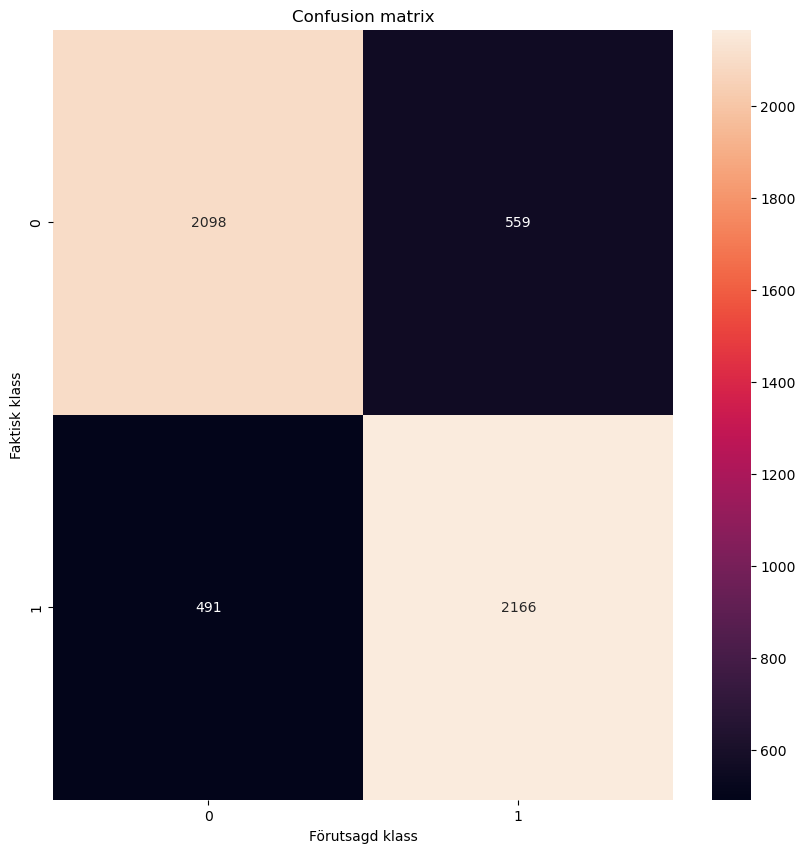

In [649]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('Faktisk klass')
plt.xlabel('Förutsagd klass')
plt.show()




In [621]:
conf_matrix

array([[2098,  559],
       [ 491, 2166]])

In [622]:
for cls in test_set.class_indices:
    print(cls, (y_true == test_set.class_indices[cls]).sum())

Female 2657
Male 2657


In [623]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2657
           1       0.79      0.82      0.80      2657

    accuracy                           0.80      5314
   macro avg       0.80      0.80      0.80      5314
weighted avg       0.80      0.80      0.80      5314



In [387]:
images = tf.keras.utils.image_dataset_from_directory('/Users/yari/2023/Applicerad_AI/fairfacedata/structured_images (kopia 2)',
                                                    image_size=(64, 64)
)

Found 35424 files belonging to 7 classes.


In [265]:
image_iterator = images.as_numpy_iterator()
#batch = image_iterator.next()
#images represented as numpy array
batch[0].shape

(32, 64, 64, 3)

In [266]:
batch[1]

array([6, 3, 6, 3, 0, 1, 2, 1, 1, 6, 2, 2, 0, 3, 6, 0, 3, 1, 0, 0, 6, 1,
       2, 0, 0, 6, 0, 6, 0, 0, 3, 3], dtype=int32)

In [267]:
# ska skala ner datan
scaled_images = images.map(lambda x, y: (x/255, y))
scaled_image_iterator = scaled_images.as_numpy_iterator()

In [268]:
batch = scaled_image_iterator.next()
batch[0].max()

1.0

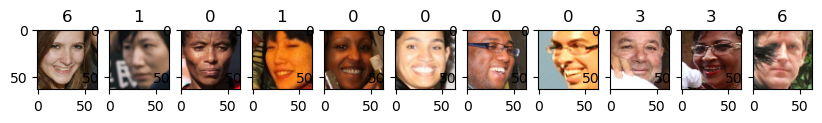

In [269]:
fig, ax = plt.subplots(ncols=11, figsize = (10,10))
for idx, img in enumerate(batch[0][:11]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [273]:
total_images = len(images)* 32

In [274]:
total_images

35424

In [275]:
train_size = int(total_images * 0.7)
val_size = int(total_images * 0.2)
test_size = int(total_images * 0.1)
print(f'Train size: {train_size} \nTest size: {test_size} \nValidation size: {validate_size}')

Train size: 24796 
Test size: 3542 
Validation size: 110


In [276]:
train = images.take(train_size)
test = images.skip(train_size).take(test_size)
validate = images.skip(train_size+test_size).take(validate_size)

In [277]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout

In [283]:
model = Sequential()
# adding convolotional layer
model.add(Conv2D(16, (5,5),1, activation = 'relu', input_shape = (64,64,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5,5),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (5,5),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(164, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

In [284]:
import tensorflow as tf
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 60, 60, 16)        1216      
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 30, 30, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 26, 26, 32)        12832     
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 4, 4, 64)        

In [285]:
log_directory= '/Users/yari/2023/Applicerad_AI/fairfacedata/logs'
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_checkpoint = ModelCheckpoint(
    '/Users/yari/2023/Applicerad_AI/fairfacedata/structured_images (kopia 2)/best_race_model.h5',
    monitor='val_loss',  
    save_best_only=True, 
    mode='min',          
    verbose=1
)

In [286]:
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0.001, patience=5, mode='min', verbose=1)

In [287]:
hist = model.fit(
    train, 
    epochs=20, 
    validation_data= validate, 
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20


/Users/yari/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1107/1107 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2000

ValueError: Expected input data to be non-empty.